In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [2]:
#importing data
document_check = "/Users/cerengundogdu/Dropbox/Berlin/3_2020/revolut/HomeTask/Task1/Data/doc_reports.csv"
dc = pd.read_csv(document_check)

facial_check = "/Users/cerengundogdu/Dropbox/Berlin/3_2020/revolut/HomeTask/Task1/Data/facial_similarity_reports.csv"
fc = pd.read_csv(facial_check)


dc['created_at']= pd.to_datetime(dc['created_at'])
dc['dc_date'] = dc['created_at'].dt.date
dc['dc_date']= pd.to_datetime(dc['dc_date'])

fc['created_at']= pd.to_datetime(fc['created_at'])
fc['fc_date'] = fc['created_at'].dt.date
fc['fc_date']= pd.to_datetime(fc['fc_date'])


In [5]:
#combinig two datasets
fc = fc.rename(columns={"user_id": "fc_user_id","result": "fc_result", "Unnamed: 0": "fc_Unnamed", "face_comparison_result": "fc_face_comparison_result", "created_at": "fc_created_at", "visual_authenticity_result": "fc_visual_authenticity_result", "properties": "fc_properties", "attempt_id": "fc_attempt_id"})
joined_table = pd.concat([dc, fc], axis=1, join='inner')
#joined_table.info()


#aggregate by date and count unique values of user id for joined table
groupj = joined_table.groupby('dc_date')
aggj = groupj.aggregate({'user_id': pd.Series.nunique})
#aggj.head()



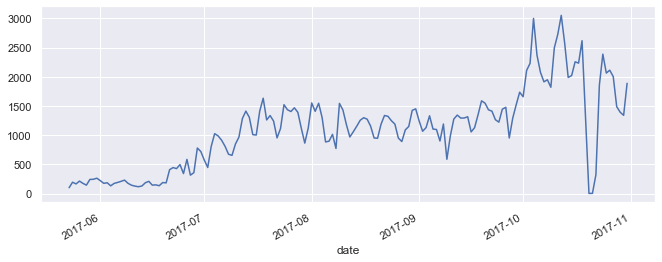

In [6]:
#number of total attempt over time
attempt_t =joined_table.pivot(index='Unnamed: 0', columns='dc_date', values='user_id').count()
attempt_t = pd.DataFrame(attempt_t).reset_index()
attempt_t.columns = ['date','number_attempt']
attempt_t = attempt_t.set_index('date')
attempt_t
sns.set(rc={'figure.figsize':(11, 4)})
attempt_t['number_attempt'].plot()


In [7]:
#creating table which the results of both datasets is clear
clear_table = joined_table[(joined_table.result == 'clear')&(joined_table.fc_result == 'clear')]
clear_table = clear_table.sort_values(by=['user_id'])
#clear_table.info()

#aggregate by date and count unique values of user id for clear table
groupc = clear_table.groupby('dc_date')
aggc = groupc.aggregate({'user_id': pd.Series.nunique})
#aggc.head()



In [8]:
#calculate pass rate 
pass_table = pd.concat([aggj, aggc ], axis=1, join='inner')
pass_table = pd.DataFrame(pass_table).reset_index()
pass_table.columns = ['date', 'number_of_attempt', 'number_of_clear_attempt']
pass_table['date']= pd.to_datetime(pass_table['date'])
pass_table = pass_table.set_index('date')
pass_table['pass_rate'] = pass_table['number_of_clear_attempt']/pass_table['number_of_attempt']

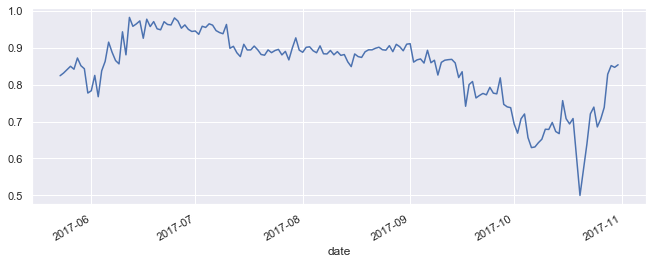

In [9]:
#plot of pass rate
sns.set(rc={'figure.figsize':(11, 4)})
pass_table['pass_rate'].plot()

plt.savefig("pass_rate.png")

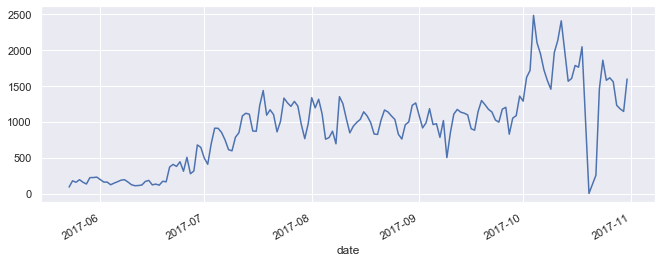

In [10]:
#plot of number of customers who attempt the process
sns.set(rc={'figure.figsize':(11, 4)})
pass_table['number_of_attempt'].plot()

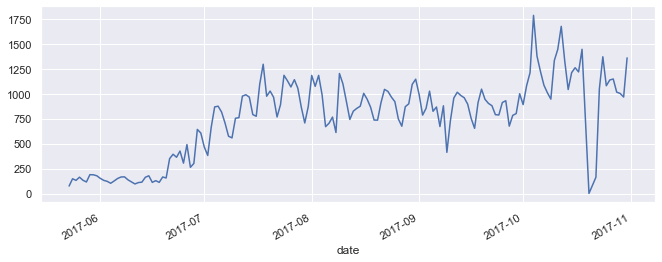

In [11]:
#plot of number of customers who pass both KYC process
sns.set(rc={'figure.figsize':(11, 4)})
pass_table['number_of_clear_attempt'].plot()

In [12]:
#function for each variables
def group_by_pivot(joined_table, column_name):
    group_v = joined_table.groupby(["dc_date", column_name])
    agg_v = group_v.aggregate({'user_id': pd.Series.nunique})
    agg_v = pd.DataFrame(agg_v).reset_index()
    agg_v.columns = ['date', column_name, 'number_of_unique_customer']
    agg_v['date']= pd.to_datetime(agg_v['date'])
    return agg_v

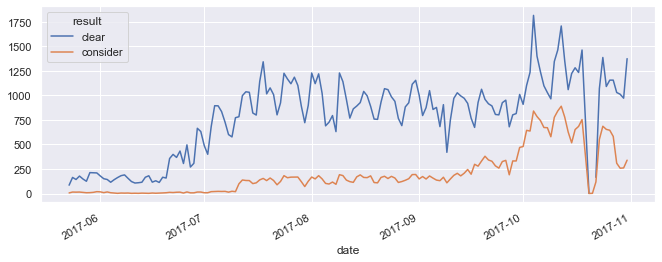

In [13]:
#plot of the results of document check
agg_dc = group_by_pivot(joined_table, 'result')
agg_dc.pivot(index='date', columns='result', 
            values='number_of_unique_customer').plot()


plt.savefig("document_check_numbers.png")


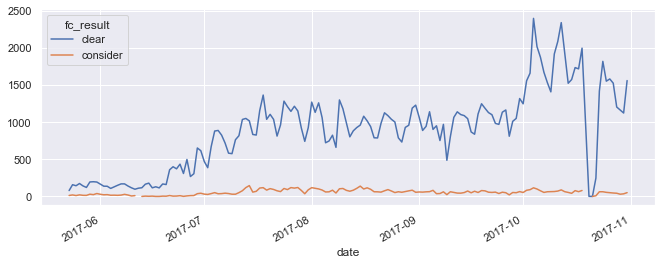

In [14]:
#plot of the results of facial similarity check
agg_dc = group_by_pivot(joined_table, 'fc_result')
agg_dc.pivot(index='date', columns='fc_result', 
            values='number_of_unique_customer').plot()

plt.savefig("facial_similarity_check_numbers.png")

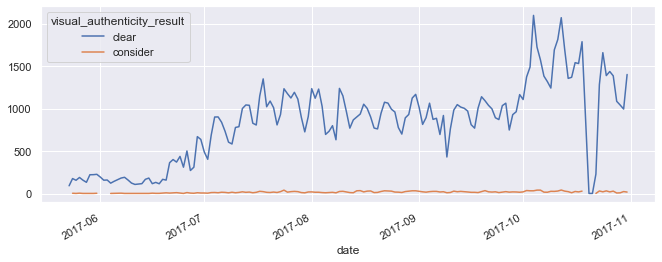

In [15]:
#we see that the decrease probably is caused by the document check file. So deep-dive into
#dc variable

#1_Visual_Authenticity_result

agg = group_by_pivot(joined_table, 'visual_authenticity_result')
agg.pivot(index='date', columns='visual_authenticity_result', 
            values='number_of_unique_customer').plot()
plt.show()


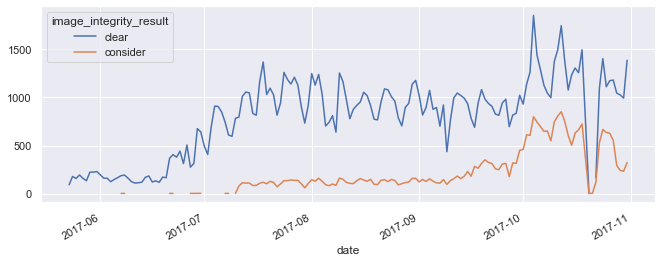

In [16]:
#2_image_integrity_result

agg = group_by_pivot(joined_table, 'image_integrity_result')
agg.pivot(index='date', columns='image_integrity_result', 
            values='number_of_unique_customer').plot()

plt.savefig("image_integrity.png")


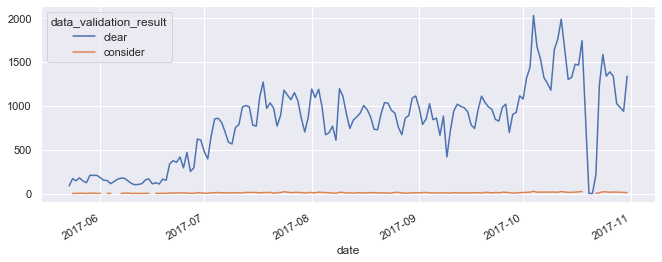

In [17]:
#3_data_validation_result

agg = group_by_pivot(joined_table, 'data_validation_result')
agg.pivot(index='date', columns='data_validation_result', 
            values='number_of_unique_customer').plot()
plt.show()


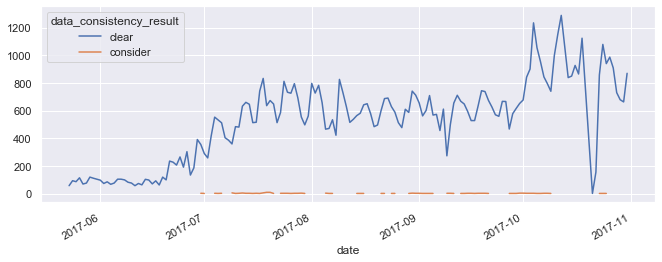

In [18]:
#4_data_consistency_result

agg = group_by_pivot(joined_table, 'data_consistency_result')
agg.pivot(index='date', columns='data_consistency_result', 
            values='number_of_unique_customer').plot()
plt.show()


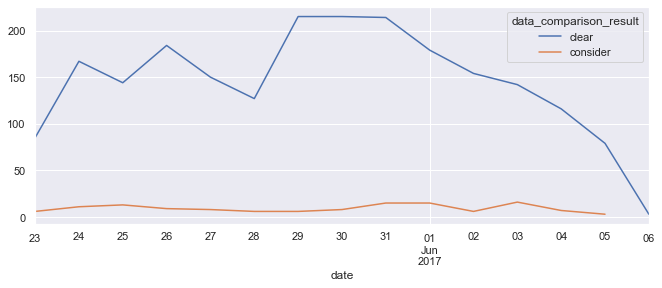

In [19]:
#5_data_comparison_result

agg = group_by_pivot(joined_table, 'data_comparison_result')
agg.pivot(index='date', columns='data_comparison_result', 
            values='number_of_unique_customer').plot()
plt.show()

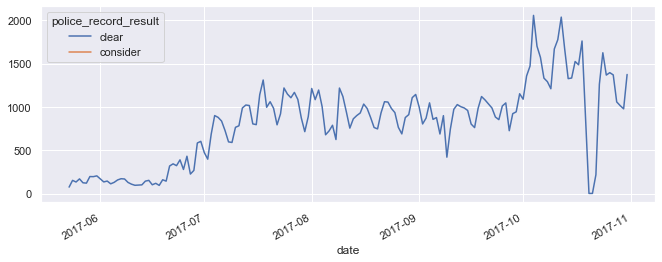

In [20]:
#6_police_record_result

agg = group_by_pivot(joined_table, 'police_record_result')
agg.pivot(index='date', columns='police_record_result', 
            values='number_of_unique_customer').plot()
plt.show()

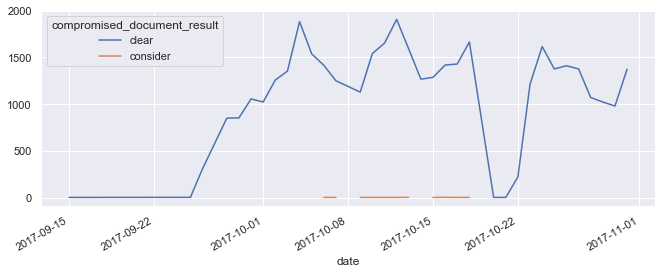

In [21]:
#7_compromised_document_result

agg = group_by_pivot(joined_table, 'compromised_document_result')
agg.pivot(index='date', columns='compromised_document_result', 
            values='number_of_unique_customer').plot()
plt.show()

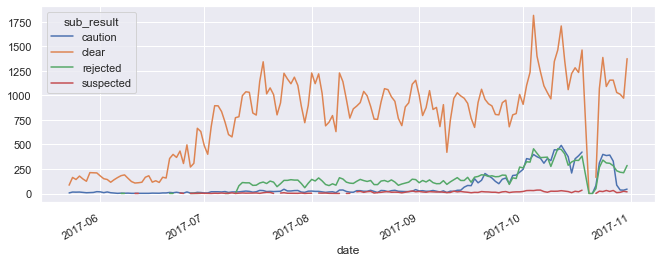

In [22]:
#sub_result

agg = group_by_pivot(joined_table, 'sub_result')
agg.pivot(index='date', columns='sub_result', 
            values='number_of_unique_customer').plot()
plt.show()

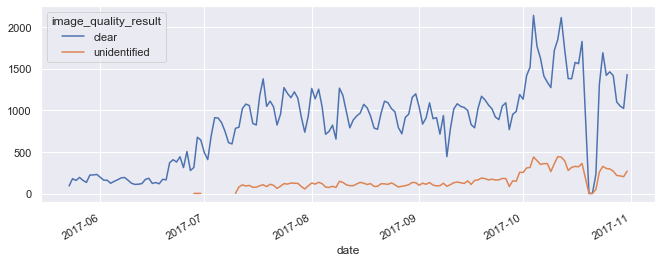

In [23]:
#There is a increase in 'consider's in image_integrity_result. 
#Let's examine deeply image_integrity_results by its breakdowns

#image_integrity_result_bd1: image_quality_result

agg = group_by_pivot(joined_table, 'image_quality_result')
agg.pivot(index='date', columns='image_quality_result', 
            values='number_of_unique_customer').plot()

plt.savefig("image_quality_result.png")

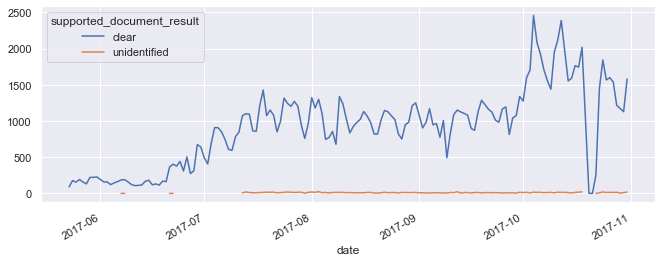

In [24]:
#image_integrity_result_bd2: supported_document_result

agg = group_by_pivot(joined_table, 'supported_document_result')
agg.pivot(index='date', columns='supported_document_result', 
            values='number_of_unique_customer').plot()
plt.show()

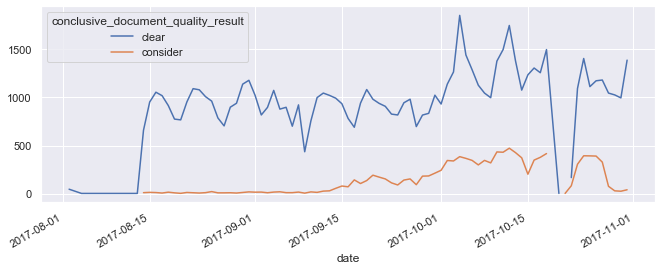

In [27]:
#image_integrity_result_bd3: conclusive_document_quality_result

agg = group_by_pivot(joined_table, 'conclusive_document_quality_result')
agg.pivot(index='date', columns='conclusive_document_quality_result', 
            values='number_of_unique_customer').plot()


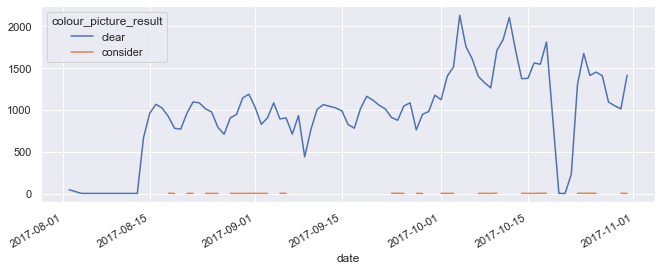

In [28]:
#image_integrity_result_bd4: colour_picture_result

agg = group_by_pivot(joined_table, 'colour_picture_result')
agg.pivot(index='date', columns='colour_picture_result', 
            values='number_of_unique_customer').plot()
plt.show()

In [30]:
drop_cols = ['number_of_clear_attempt','number_of_attempt']
pt1 = pass_table.drop(drop_cols, axis=1)




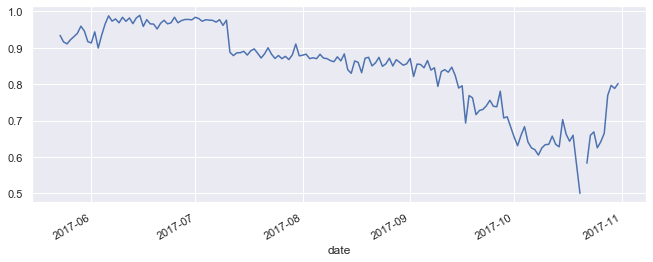

In [31]:
dc_result = group_by_pivot(joined_table, 'result')
dc_r = dc_result.pivot(index='date', columns='result', values='number_of_unique_customer')
dc_r['dc'] = dc_r['clear']/(dc_r['clear']+ dc_r['consider'])
dc_r['consider'] = dc_r['consider'].fillna(0)
dc_r['clear'] = dc_r['clear'].fillna(0)
drop_cols = ['clear','consider']
pt2 = dc_r.drop(drop_cols, axis=1)

sns.set(rc={'figure.figsize':(11, 4)})
dc_r['dc'].plot()
plt.savefig('document_check_numbers_rate.png')


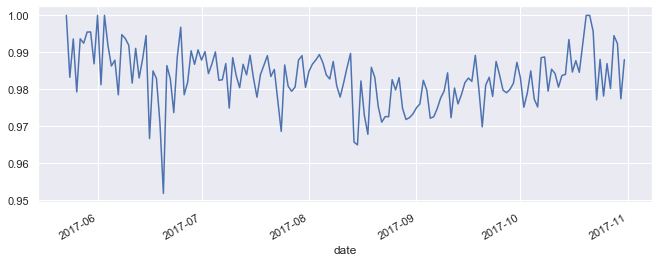

In [32]:
t_visual_authenticity_result = group_by_pivot(joined_table, 'visual_authenticity_result')
pt_var = t_visual_authenticity_result.pivot(index='date', columns='visual_authenticity_result', values='number_of_unique_customer')
pt_var['consider'] = pt_var['consider'].fillna(0)
pt_var['clear'] = pt_var['clear'].fillna(0)
pt_var['var'] = pt_var['clear']/(pt_var['clear']+ pt_var['consider'])

drop_cols = ['clear','consider']
pt3 = pt_var.drop(drop_cols, axis=1)
sns.set(rc={'figure.figsize':(11, 4)})
pt_var['var'].plot()


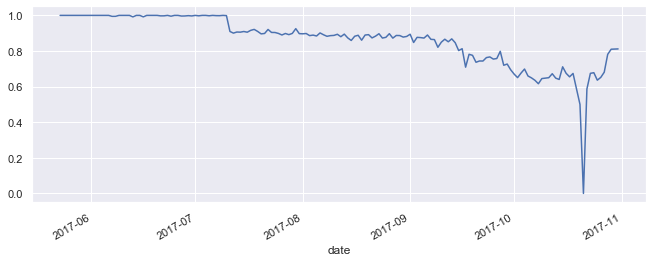

In [33]:
t_image_integrity_result = group_by_pivot(joined_table, 'image_integrity_result')
pt_iir = t_image_integrity_result.pivot(index='date', columns='image_integrity_result', values='number_of_unique_customer')
pt_iir['consider'] = pt_iir['consider'].fillna(0)
pt_iir['clear'] = pt_iir['clear'].fillna(0)
pt_iir['iir'] = pt_iir['clear']/(pt_iir['clear']+ pt_iir['consider'])

drop_cols = ['clear','consider']
pt4 = pt_iir.drop(drop_cols, axis=1)
pt_iir['iir'].plot()



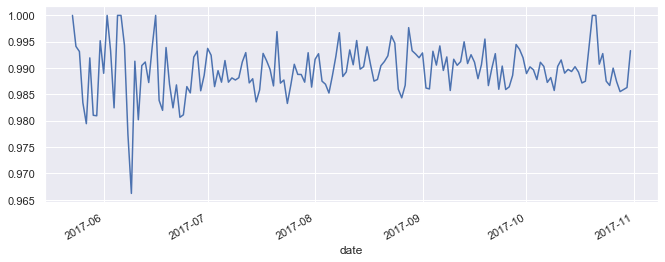

In [34]:
t_data_validation_result = group_by_pivot(joined_table, 'data_validation_result')
pt_dvr = t_data_validation_result.pivot(index='date', columns='data_validation_result', values='number_of_unique_customer')
pt_dvr['consider'] = pt_dvr['consider'].fillna(0)
pt_dvr['clear'] = pt_dvr['clear'].fillna(0)
pt_dvr['dvr'] = pt_dvr['clear']/(pt_dvr['clear']+ pt_dvr['consider'])

drop_cols = ['clear','consider']
pt5 = pt_dvr.drop(drop_cols, axis=1)
pt_dvr['dvr'].plot()


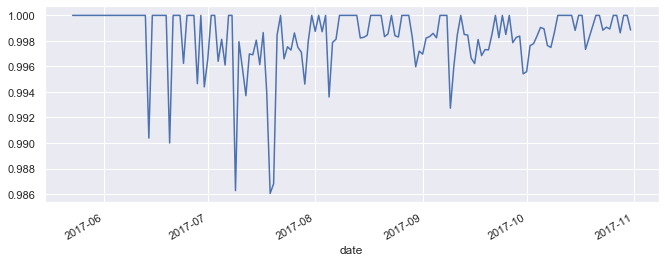

In [35]:
t_data_consistency_result = group_by_pivot(joined_table, 'data_consistency_result')
pt_dcr = t_data_consistency_result.pivot(index='date', columns='data_consistency_result', values='number_of_unique_customer')
pt_dcr['consider'] = pt_dcr['consider'].fillna(0)
pt_dcr['clear'] = pt_dcr['clear'].fillna(0)
pt_dcr['dcr'] = pt_dcr['clear']/(pt_dcr['clear']+ pt_dcr['consider'])

drop_cols = ['clear','consider']
pt6 = pt_dcr.drop(drop_cols, axis=1)
pt_dcr['dcr'].plot()


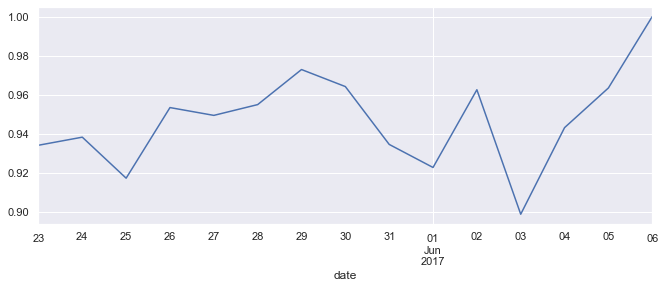

In [36]:
t_data_comparison_result = group_by_pivot(joined_table, 'data_comparison_result')
pt_dcomr = t_data_comparison_result.pivot(index='date', columns='data_comparison_result', values='number_of_unique_customer')
pt_dcomr['consider'] = pt_dcomr['consider'].fillna(0)
pt_dcomr['clear'] = pt_dcomr['clear'].fillna(0)
pt_dcomr['dcomr'] = pt_dcomr['clear']/(pt_dcomr['clear']+ pt_dcomr['consider'])

drop_cols = ['clear','consider']
pt7 = pt_dcomr.drop(drop_cols, axis=1)

pt_dcomr['dcomr'].plot()


In [37]:
t_police_record_result = group_by_pivot(joined_table, 'police_record_result')
pt_prr = t_police_record_result.pivot(index='date', columns='police_record_result', values='number_of_unique_customer')
pt_prr['consider'] = pt_prr['consider'].fillna(0)
pt_prr['clear'] = pt_prr['clear'].fillna(0)
pt_prr['prr'] = pt_prr['clear']/(pt_prr['clear']+ pt_prr['consider'])

drop_cols = ['clear','consider']
pt8 = pt_prr.drop(drop_cols, axis=1)


In [38]:
t_compromised_document_result = group_by_pivot(joined_table, 'compromised_document_result')
pt_cdr = t_compromised_document_result.pivot(index='date', columns='compromised_document_result', values='number_of_unique_customer')
pt_cdr['consider'] = pt_cdr['consider'].fillna(0)
pt_cdr['clear'] = pt_cdr['clear'].fillna(0)
pt_cdr['cdr'] = pt_cdr['clear']/(pt_cdr['clear']+ pt_cdr['consider'])
drop_cols = ['clear','consider']
pt9 = pt_cdr.drop(drop_cols, axis=1)


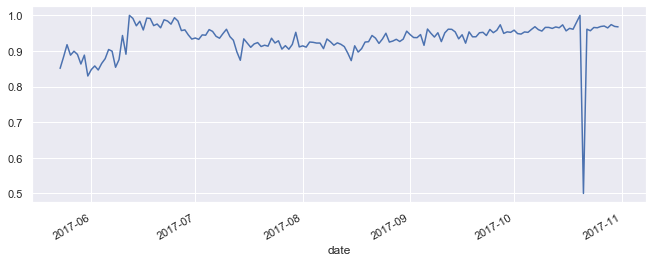

In [39]:
t_fc_result = group_by_pivot(joined_table, 'fc_result')
pt_fcr = t_fc_result.pivot(index='date', columns='fc_result', values='number_of_unique_customer')
pt_fcr['consider'] = pt_fcr['consider'].fillna(0)
pt_fcr['clear'] = pt_fcr['clear'].fillna(0)
pt_fcr['fcr'] = pt_fcr['clear']/(pt_fcr['clear']+ pt_fcr['consider'])

drop_cols = ['clear','consider']
pt10 = pt_fcr.drop(drop_cols, axis=1)

pt_fcr['fcr'].plot()

plt.savefig("facial_similarity_check_rate.png")


In [40]:
t_fc_face_comparison_result = group_by_pivot(joined_table, 'fc_face_comparison_result')
pt_fc_fcr = t_fc_face_comparison_result.pivot(index='date', columns='fc_face_comparison_result', values='number_of_unique_customer')
pt_fc_fcr['consider'] = pt_fc_fcr['consider'].fillna(0)
pt_fc_fcr['clear'] = pt_fc_fcr['clear'].fillna(0)
pt_fc_fcr['fcr'] = pt_fc_fcr['clear']/(pt_fc_fcr['clear']+ pt_fc_fcr['consider'])

drop_cols = ['clear','consider']
pt11 = pt_fc_fcr.drop(drop_cols, axis=1)


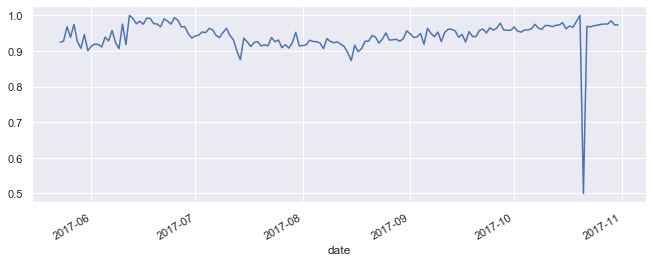

In [41]:
t_fc_facial_image_integrity_result = group_by_pivot(joined_table, 'facial_image_integrity_result')
pt_fc_fiir = t_fc_facial_image_integrity_result.pivot(index='date', columns='facial_image_integrity_result', values='number_of_unique_customer')
pt_fc_fiir['consider'] = pt_fc_fiir['consider'].fillna(0)
pt_fc_fiir['clear'] = pt_fc_fiir['clear'].fillna(0)
pt_fc_fiir['fc_fiir'] = pt_fc_fiir['clear']/(pt_fc_fiir['clear']+ pt_fc_fiir['consider'])

drop_cols = ['clear','consider']
pt12 = pt_fc_fiir.drop(drop_cols, axis=1)

pt_fc_fiir['fc_fiir'].plot()



In [42]:
t_fc_visual_authenticity_result= group_by_pivot(joined_table, 'fc_visual_authenticity_result')
pt_fc_var = t_fc_visual_authenticity_result.pivot(index='date', columns='fc_visual_authenticity_result', values='number_of_unique_customer')
pt_fc_var['consider'] = pt_fc_var['consider'].fillna(0)
pt_fc_var['clear'] = pt_fc_var['clear'].fillna(0)
pt_fc_var['fc_var'] = pt_fc_var['clear']/(pt_fc_var['clear']+ pt_fc_var['consider'])

drop_cols = ['clear','consider']
pt13 = pt_fc_var.drop(drop_cols, axis=1)


In [43]:
t_face_detection_result= group_by_pivot(joined_table, 'face_detection_result')
pt_fdr = t_face_detection_result.pivot(index='date', columns='face_detection_result', values='number_of_unique_customer')
pt_fdr['consider'] = pt_fdr['consider'].fillna(0)
pt_fdr['clear'] = pt_fdr['clear'].fillna(0)
pt_fdr['fdr'] = pt_fdr['clear']/(pt_fdr['clear']+ pt_fdr['consider'])

drop_cols = ['clear','consider']
pt14 = pt_fdr.drop(drop_cols, axis=1)


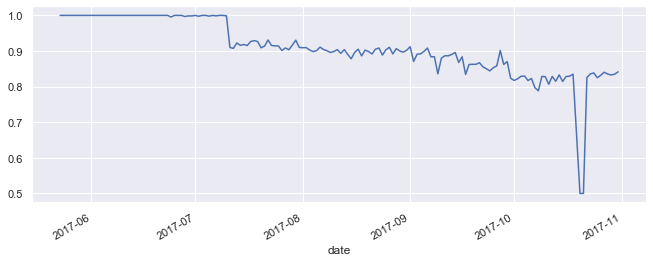

In [44]:
t_image_quality_result= group_by_pivot(joined_table, 'image_quality_result')
pt_iqr = t_image_quality_result.pivot(index='date', columns='image_quality_result', values='number_of_unique_customer')
pt_iqr['unidentified'] = pt_iqr['unidentified'].fillna(0)
pt_iqr['clear'] = pt_iqr['clear'].fillna(0)
pt_iqr['iqr'] = pt_iqr['clear']/(pt_iqr['clear']+ pt_iqr['unidentified'])


drop_cols = ['clear','unidentified']
pt15 = pt_iqr.drop(drop_cols, axis=1)

pt_iqr['iqr'].plot()



In [45]:
t_supported_document_result= group_by_pivot(joined_table, 'supported_document_result')
pt_sdr = t_supported_document_result.pivot(index='date', columns='supported_document_result', values='number_of_unique_customer')
pt_sdr['unidentified'] = pt_sdr['unidentified'].fillna(0)
pt_sdr['clear'] = pt_sdr['clear'].fillna(0)
pt_sdr['sdr'] = pt_sdr['clear']/(pt_sdr['clear']+ pt_sdr['unidentified'])
drop_cols = ['clear','unidentified']
pt16 = pt_sdr.drop(drop_cols, axis=1)



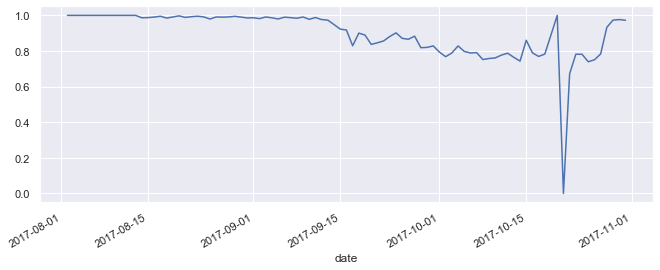

In [46]:
t_conclusive_document_quality_result= group_by_pivot(joined_table, 'conclusive_document_quality_result')
pt_cdqr = t_conclusive_document_quality_result.pivot(index='date', columns='conclusive_document_quality_result', values='number_of_unique_customer')
pt_cdqr['consider'] = pt_cdqr['consider'].fillna(0)
pt_cdqr['clear'] = pt_cdqr['clear'].fillna(0)
pt_cdqr['cdqr'] = pt_cdqr['clear']/(pt_cdqr['clear']+ pt_cdqr['consider'])
drop_cols = ['clear','consider']
pt17 = pt_cdqr.drop(drop_cols, axis=1)
pt_cdqr
pt_cdqr['cdqr'].plot()


In [47]:
t_colour_picture_result= group_by_pivot(joined_table, 'colour_picture_result')
pt_cpr = t_colour_picture_result.pivot(index='date', columns='colour_picture_result', values='number_of_unique_customer')
pt_cpr['consider'] = pt_cpr['consider'].fillna(0)
pt_cpr['clear'] = pt_cpr['clear'].fillna(0)
pt_cpr['cpr'] = pt_cpr['clear']/(pt_cpr['clear']+ pt_cpr['consider'])
pt_cpr
drop_cols = ['clear','consider']
pt18 = pt_cpr.drop(drop_cols, axis=1)



In [48]:
variable_table = pd.concat([pt1, pt2, pt3, pt4, pt5, pt6, pt7, pt8, pt9, pt10, pt11, pt12, pt13,
                       pt14, pt15, pt16, pt17, pt18],
                      axis=1)
print(variable_table)

            pass_rate        dc       var       iir       dvr       dcr  \
date                                                                      
2017-05-23   0.824176  0.934066  1.000000  1.000000  1.000000  1.000000   
2017-05-24   0.831461  0.916201  0.983240  1.000000  0.994118  1.000000   
2017-05-25   0.840764  0.910828  0.993631  1.000000  0.993151  1.000000   
2017-05-26   0.849741  0.922280  0.979275  1.000000  0.983425  1.000000   
2017-05-27   0.841772  0.930818  0.993671  1.000000  0.979452  1.000000   
...               ...       ...       ...       ...       ...       ...   
2017-10-27   0.738432  0.665132  0.980198  0.680876  0.987435  1.000000   
2017-10-28   0.828176  0.769231  0.994505  0.781180  0.985535  0.998632   
2017-10-29   0.851569  0.796850  0.992381  0.809937  0.985915  1.000000   
2017-10-30   0.846894  0.788321  0.977407  0.810767  0.986316  1.000000   
2017-10-31   0.853827  0.801749  0.988020  0.811696  0.993304  0.998852   

               dcomr  pr

In [49]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
variable_table_s = pd.DataFrame(ss.fit_transform(variable_table),columns = variable_table.columns)
covMat = variable_table_s.cov()
covMat

,pass_rate,dc,var,iir,dvr,dcr,dcomr,prr,cdr,fcr,fcr,fc_fiir,fc_var,fdr,iqr,sdr,cdqr,cpr
pass_rate,1.006289,0.925985,-0.094222,7.749209e-01,-0.076513,-1.180947e-01,3.474814e-01,7.234781e-02,0.107471,-0.058634,-0.002506,-0.104202,-0.094222,0.103000,7.093215e-01,1.437984e-01,0.607492,-0.055690
dc,0.925985,1.006289,0.081548,8.715254e-01,-0.092564,-4.195041e-02,1.991895e-01,9.772736e-02,0.079909,-0.226881,-0.357642,-0.148174,0.081548,0.250194,8.372277e-01,3.617899e-01,0.534761,-0.023922
var,-0.094222,0.081548,1.006250,-1.266204e-02,-0.089815,1.333686e-01,-3.873278e-01,1.593331e-02,0.138312,-0.215454,-0.365774,-0.081603,1.006250,0.544028,2.288826e-02,2.981345e-01,-0.397690,0.314315
iir,0.774921,0.871525,-0.012662,1.006250e+00,-0.168418,-5.012433e-02,7.043401e-33,7.789075e-02,-0.042859,0.126029,-0.399514,0.263136,-0.012662,0.190004,9.421637e-01,2.908244e-01,0.903505,-0.092914
dvr,-0.076513,-0.092564,-0.089815,-1.684183e-01,1.006250,4.996061e-02,-1.416787e-02,4.627400e-02,0.142665,-0.136587,0.027750,-0.159862,-0.089815,-0.101978,-2.105649e-01,-6.832342e-02,-0.054224,0.048186
dcr,-0.118095,-0.041950,0.133369,-5.012433e-02,0.049961,1.006289e+00,3.521700e-33,1.482571e-01,-0.027209,-0.085598,-0.225486,0.003880,0.133369,-0.013365,-8.248539e-03,1.427781e-01,-0.056770,-0.032642
dcomr,0.347481,0.199189,-0.387328,7.043401e-33,-0.014168,3.521700e-33,1.071429e+00,3.521700e-33,NaN,0.196596,0.489059,0.004975,-0.387328,-0.243652,-7.043401e-33,7.043401e-33,NaN,NaN
prr,0.072348,0.097727,0.015933,7.789075e-02,0.046274,1.482571e-01,3.521700e-33,1.006250e+00,-0.047341,-0.035637,-0.099441,-0.002646,0.015933,0.082289,1.082149e-01,8.827310e-02,-0.073475,-0.030536
cdr,0.107471,0.079909,0.138312,-4.285946e-02,0.142665,-2.720902e-02,NaN,-4.734076e-02,1.028571,-0.187560,-0.000423,-0.202516,0.138312,0.010539,-1.435065e-01,-5.625755e-02,0.008520,0.056020
fcr,-0.058634,-0.226881,-0.215454,1.260295e-01,-0.136587,-8.559756e-02,1.965959e-01,-3.563654e-02,-0.187560,1.006250,0.459916,0.936908,-0.215454,-0.066137,8.876775e-02,-5.112519e-02,0.600005,-0.160433


In [50]:
corrMat = variable_table_s.corr()
corrMat

,pass_rate,dc,var,iir,dvr,dcr,dcomr,prr,cdr,fcr,fcr,fc_fiir,fc_var,fdr,iqr,sdr,cdqr,cpr
pass_rate,1.000000,0.920197,-0.094807,8.823590e-01,-0.077003,-1.224676e-01,8.185258e-01,7.169712e-02,0.132856,-0.083732,-0.002484,-0.174897,-0.094807,0.102232,7.707354e-01,1.432483e-01,0.853634,-0.054469
dc,0.920197,1.000000,0.082055,9.923572e-01,-0.093156,-4.274065e-02,9.286700e-01,9.684841e-02,0.136112,-0.323999,-0.354550,-0.248701,0.082055,0.248330,9.097160e-01,3.604059e-01,0.892490,-0.027790
var,-0.094807,0.082055,1.000000,-1.258339e-02,-0.089257,1.341976e-01,-4.208890e-01,1.583435e-02,0.161294,-0.214116,-0.363502,-0.081096,1.000000,0.540649,2.274610e-02,2.962827e-01,-0.420622,0.332440
iir,0.882359,0.992357,-0.012583,1.000000e+00,-0.167372,-5.076184e-02,2.960595e-17,7.740695e-02,-0.044446,0.125247,-0.397032,0.261502,-0.012583,0.188823,9.363118e-01,2.890180e-01,0.937982,-0.096460
dvr,-0.077003,-0.093156,-0.089257,-1.673722e-01,1.000000,5.028037e-02,-8.302921e-03,4.598659e-02,0.189902,-0.135739,0.027577,-0.158869,-0.089257,-0.101345,-2.092570e-01,-6.789905e-02,-0.075812,0.067370
dcr,-0.122468,-0.042741,0.134198,-5.076184e-02,0.050280,1.000000e+00,2.960595e-17,1.469237e-01,-0.052256,-0.085320,-0.223537,0.003865,0.134198,-0.013265,-8.962708e-03,1.422320e-01,-0.099877,-0.057511
dcomr,0.818526,0.928670,-0.420889,2.960595e-17,-0.008303,2.960595e-17,1.000000e+00,2.960595e-17,NaN,0.364123,0.601292,0.009956,-0.420889,-0.588165,-2.960595e-17,2.960595e-17,NaN,NaN
prr,0.071697,0.096848,0.015834,7.740695e-02,0.045987,1.469237e-01,2.960595e-17,1.000000e+00,-0.046266,-0.035415,-0.098823,-0.002629,0.015834,0.081778,1.075428e-01,8.772482e-02,-0.065104,-0.027058
cdr,0.132856,0.136112,0.161294,-4.444640e-02,0.189902,-5.225589e-02,NaN,-4.626628e-02,1.000000,-0.113343,-0.008755,-0.110230,0.161294,0.020122,-1.416023e-01,-1.026379e-01,0.007391,0.063483
fcr,-0.083732,-0.323999,-0.214116,1.252467e-01,-0.135739,-8.531978e-02,3.641233e-01,-3.541520e-02,-0.113343,1.000000,0.457059,0.931089,-0.214116,-0.065726,8.821640e-02,-5.080764e-02,0.526259,-0.140714


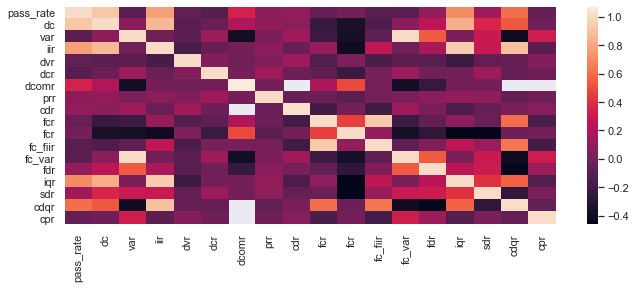

In [51]:
import seaborn as sns
                                                                                          
sns.heatmap(covMat, xticklabels=covMat.columns.values, yticklabels=covMat.columns.values)

plt.savefig("heatmap_cov_mat.png")